## Reading and visualizing multiple images

This basic tutorial covers how to read images stored multiple folders. **tsraster** stacks these images and renders one image with multiple bands.

In [14]:
import os.path

import matplotlib.pyplot as plt
%matplotlib inline

import tsraster
from tsraster.prep import sRead as tr

from math import ceil


connect to the data directory

In [2]:
path = r"C:/Users/mmann/Documents/ts-raster-example-data/1year/"

the images in this directory are structured as: 
    - temperature:
        2005
          tmx-200501.tif
          tmx-200502.tif
          tmx-200503.tif
        2006
          tmx-200601.tif
          tmx-200602.tif
          tmx-200603.tif
        2007
          tmx-200701.tif
          tmx-200702.tif
          tmx-200703.tif
 

Accordingly, for temprature we have three years of data and for each year we have three monthly data. 

    'tmx-200501.tif': temprature (the variable), 2005 (the year), 01 (the month)


Read the images and print their corresponding name

In [3]:
image_name = tr.image_names(path)
print(image_name)

['aet-198401', 'aet-198402', 'aet-198403', 'aet-198404', 'aet-198405', 'aet-198406', 'aet-198407', 'aet-198408', 'aet-198409', 'aet-198410', 'aet-198411', 'aet-198412']


Convert each to array and stack them as bands

In [4]:
rasters = tr.image2array(path)

In [9]:
# first image
rasters[0][1:10,:]

array([[-9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999.,
        -9999., -9999., -9999., -9999.],
       [-9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999.,
        -9999., -9999., -9999., -9999.],
       [-9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999.,
        -9999., -9999., -9999., -9999.],
       [-9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999.,
        -9999., -9999., -9999., -9999.],
       [-9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999.,
        -9999., -9999., -9999., -9999.],
       [-9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999.,
        -9999., -9999., -9999., -9999.],
       [-9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999.,
        -9999., -9999., -9999., -9999.],
       [-9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999.,
        -9999., -9999., -9999., -9999.],
       [-9999., -9999., -9999., -9999., -9999., -9999., -9999., -9999.,
        -9999., -9999., 

Check the total number of images (bands stacked together)

In [10]:
rasters.shape

(1209, 941, 12)

Visualize

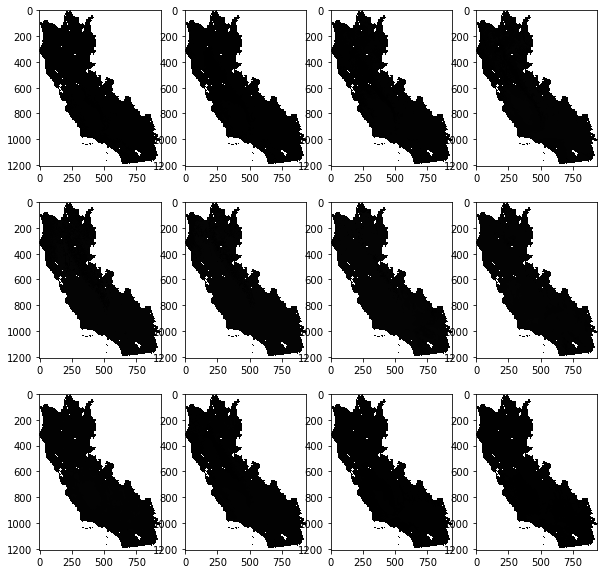

In [11]:
fig, ax = plt.subplots(3, 2,figsize=(10,10))
cols = 4

for i in range(0,rasters.shape[2]):
    img = rasters[:,:,i]
    i = i+1
    plt.subplot(ceil(rasters.shape[2]/cols),cols,i)
    plt.imshow(img, cmap="Greys")


In [12]:
# clean up
del rasters
import gc
gc.collect()

31

# Feature extraction


This documents show how to extract important timeseries charcterstics from raster files.

In [1]:
import os.path

import matplotlib.pyplot as plt
%matplotlib inline

from rasterio.plot import show

import tsraster
from tsraster.prep import sRead as tr

from tsraster.calculate import calculateFeatures
from tsraster.calculate import features2array

connect to the data directory

In [2]:
path = r"../Data/Examples/3month/"

read the images and convert the arrays to a time-series dataframe 

In [3]:
rasters = tr.ts_series(path)

Lets take a look at the time-series data

In [4]:
rasters.head(10)

,id,kind,value,time
0,1,aet-198401,0.0,198401
1,1,aet-198402,0.0,198402
2,1,aet-198403,0.0,198403
3,2,aet-198401,0.0,198401
4,2,aet-198402,0.0,198402
5,2,aet-198403,0.0,198403
6,3,aet-198401,0.0,198401
7,3,aet-198402,0.0,198402
8,3,aet-198403,0.0,198403
9,4,aet-198401,0.0,198401


Accordingly, each pixel is identified by *id*. Since there are 9 bands (3 images per year), **tsraster** assigns each 9 first pixels the id number 1 and differentiate each by their respective year and month. Hence, the *time* column organizes and orders pixels by time. The *value* column represent the pixel value

We can summerize the data and examine its pattern.

In [5]:
rasters.describe()

,value
count,3.413007e+06
mean,7.581176e+00
std,1.725681e+01
min,-1.000000e-02
25%,0.000000e+00
50%,0.000000e+00
75%,1.390000e+00
max,1.091640e+02


Let's go ahead and extract features

In [6]:
import os.path
import matplotlib.pyplot as plt
%matplotlib inline
from rasterio.plot import show
import tsraster
from tsraster.prep import sRead as tr
from tsraster.calculate import calculateFeatures
from tsraster.calculate import features2array


Create feature dictionary and extract features


In [7]:
fc_parameters = {
    "mean": None,
    "maximum": None,
    "minimum":None,
    # example: pass multiple aurguments 
    "quantile":[{"q": 0.15}, {"q": 0.95}]
}


In [8]:
ts_features = calculateFeatures(path,parameters=fc_parameters,reset_df=False,tiff_output=True)

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 30/30 [01:59<00:00,  2.28s/it]


features:..\Data\Examples\3month_features\extracted_features.csv
tif:..\Data\Examples\3month_features\extracted_features.tiff


The feature extraction swift through all bands and calculate values such maximum, minimum and mean, quantile values. 
In this instance, 4 features of temprature data are generated for 9 rasters representing 3 months of 3 years of data.

Features are written out to a multiband image called extraced_features.tif, band names to feature_names.csv and datatable of features to extracted_features.csv.

Let's take a look at the summary of these features.

In [9]:
ts_features.describe()

,aet-value__maximum,aet-value__mean,aet-value__minimum,aet-value__quantile__q_0.15,aet-value__quantile__q_0.95
count,1.137669e+06,1.137669e+06,1.137669e+06,1.137669e+06,1.137669e+06
mean,1.340666e+01,7.581178e+00,3.790800e+00,4.317382e+00,1.262060e+01
std,2.460778e+01,1.486740e+01,9.150505e+00,1.002792e+01,2.325263e+01
min,-1.600000e-03,-3.500000e-03,-1.000000e-02,-7.500000e-03,-1.600000e-03
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.255937e+01,6.163333e+00,4.000000e-03,2.825000e-01,1.181744e+01
max,1.091640e+02,7.575850e+01,6.213520e+01,6.221464e+01,1.045296e+02


Next, convert these features to array, visualize or create a tiff

In [12]:
# first, get the original dimension/shape of image 
og_rasters = tr.image2array(path)
rows, cols, nums = og_rasters.shape


# convert df to matrix array
matrix_features = ts_features.values
num_of_layers = matrix_features.shape[1]


f2Array = matrix_features.reshape(rows, cols, num_of_layers)
print(f2Array.shape)


(1209, 941, 5)


visualize features

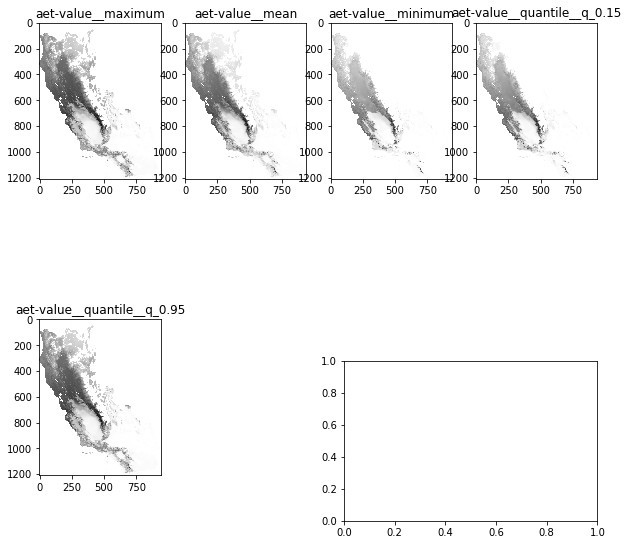

In [15]:
fig, ax = plt.subplots(3, 2,figsize=(10,10))
cols = 4

for i in range(0,f2Array.shape[2]):
    img = f2Array[:,:,i]
    i = i+1
    plt.subplot(ceil(f2Array.shape[2]/cols),cols,i)
    plt.imshow(img, cmap="Greys")
    plt.title(ts_features.columns[i-1])

In [ ]:

#useful coode to inspect source code of any function
import inspect
source_DF = inspect.getsource(calculateFeatures)
print( source_DF)